## Homework 1 - DSP 
***
#### submitted by 
#### Aylon Feraru i.d: 325214492
#### Shay Bach i.d: 316147016



In [2]:
### imports
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import lfilter
#%matplotlib widget 


# Ensure this magic command is run in the notebook to enable interactive plots
#%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

def plot_three_side_by_side(x1, y1, x2, y2, x3, y3, titles):
    """
    Plots three sets of x-y data side by side with titles.

    Parameters:
        x1, y1, x2, y2, x3, y3: np.ndarray
            The x and y data for each of the three plots.
        titles (list of str): A list of 3 strings containing the titles for each plot.

    Example Usage:
        x1, y1 = np.array([1, 2, 3]), np.array([4, 5, 6])
        x2, y2 = np.array([1, 2, 3]), np.array([6, 5, 4])
        x3, y3 = np.array([1, 2, 3]), np.array([7, 8, 9])
        titles = ["Plot 1", "Plot 2", "Plot 3"]
        plot_three_side_by_side(x1, y1, x2, y2, x3, y3, titles)
    """
    if len(titles) != 3:
        raise ValueError("Please provide exactly 3 titles.")
    
    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns
    
    # Plot each dataset
    datasets = [(x1, y1), (x2, y2), (x3, y3)]
    for i, (ax, (x, y), title) in enumerate(zip(axes, datasets, titles)):
        ax.plot(x, y, marker='o')  # Plot with markers
        ax.set_title(title)       # Set the title
        ax.set_xlabel("Samples")   # Label x-axis
        ax.set_ylabel("Amplitude")   # Label y-axis
        ax.grid(True)             # Enable grid for better readability
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()



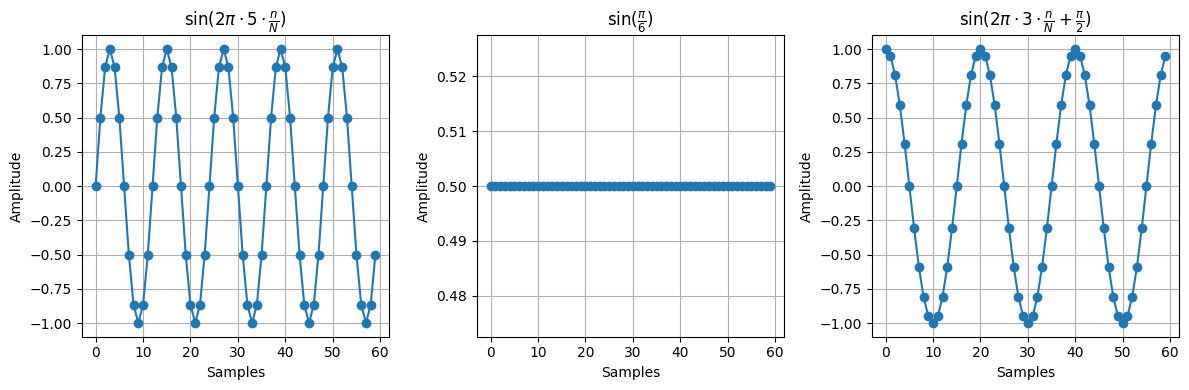

In [3]:
def Sine(f: float, N: int, ph: float) -> np.ndarray: 
    n = np.arange(N)
    sine_signal = np.sin((2 * np.pi * f * n )/N + ph,dtype=np.float64)
    return sine_signal 
## f is in cycles per samples. 

sine_1 = Sine(5,60,0)
sine_2 = Sine(0,60,np.pi/6)
sine_3 = Sine(3,60,np.pi/2)
    

plot_three_side_by_side(np.arange(60),sine_1,np.arange(60),sine_2,np.arange(60),sine_3,titles=[r"$\sin(2\pi \cdot 5 \cdot \frac{n}{N})$",r"$\sin(\frac{\pi}{6})$"
                                                                                               ,r"$\sin(2\pi \cdot 3 \cdot \frac{n}{N} + \frac{\pi}{2})$"])

#### Sine Explanation
In the first plot you can see $\sin(2\pi\cdot f\frac{n}{N})$, since $n$ is ranging between 0 and N-1, we complete $f$ cycles of $2\pi$ in the plot. for $f=5$ in the leftmost plot we complete 5 periods.  <br/>
Similarly in the rightmost plot, our phase of $\pi/2$ converts the signal to cosine,  for $f=3$ we complete $3$ periods. <br/>
In the second example we've chosen $f$ to be $0$ and chose a phase of $\phi = \frac{\pi}{6}$, getting a constant signal of $0.5$ as expected - a DC value. 


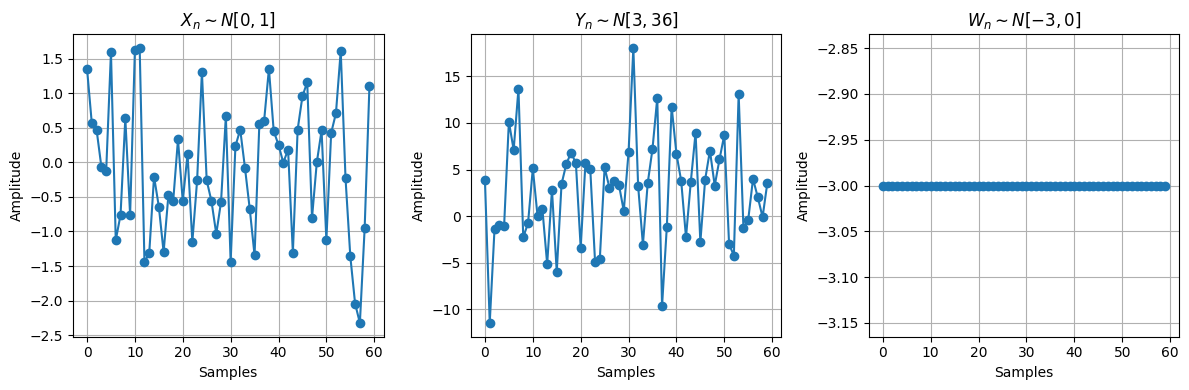

In [4]:
def WGN(N: int, u: float, s: float) -> np.ndarray:
    signal = np.random.normal(u, s, N)
    return signal 
# returns a vector of samples from a gaussian distribution

canonized_normal_wgn = WGN(60,0,1)
mean_shifted_high_variance_wgn = WGN(60,3,6)
no_variance_wgn = WGN(60,-3,0)
    

plot_three_side_by_side(np.arange(60),canonized_normal_wgn,np.arange(60),mean_shifted_high_variance_wgn,np.arange(60),no_variance_wgn,titles=[r"$X_n \sim N[0,1]$",r"$Y_n \sim N[3,36]$"
                        ,r"$W_n \sim N[-3,0]$"])



#### WGN Explanation
This function generates a white gaussian noise with specified $\mu$ and $\sigma$, we'll note that in the first sample we specified a mean of 0 and a standard deviation of 1 - as a result the average of our samples empirically approaches zero, and most are around a distance of $1-2$ from it as the normal distribution is. Around half our samples will be above or below that point. In the second plot we generated a WGN with a higher $\sigma=6$, meaning the vast majority of our samples will lie around $6-12$ points away from the $\mu=3$, we can note that the mean of $3$ causes the samples to be centered around it as opposed to 0 like previously. In the rightmost example we chose to randomly roll points with a standard deviation of $0$, our probability distribution essentionally becomes a delta around $\mu = -3$ and all our samples are -3   

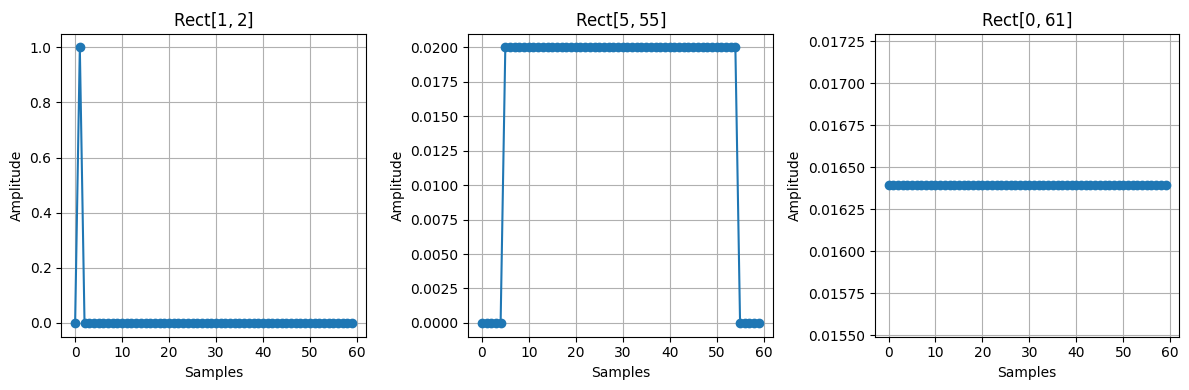

In [5]:
def Rect(a: int, b:int, N:int ) -> np.ndarray:
    #returns normalized rect from a to b incl. a but not b.
    rect_signal = np.zeros(N)
    rect_signal[a:b] = 1 #sets values between a and b to 1, incl. a but not including b.
    if (a==b):
        return rect_signal
    else: 
        rect_signal = rect_signal/(b-a)
    return rect_signal

rect_1 = Rect(1,2,N=60)
rect_2 = Rect(5,55,N=60)
rect_3 = Rect(0,61,N=60)
#print(rect_3[5])
plot_three_side_by_side(np.arange(60),rect_1,np.arange(60),rect_2,np.arange(60),rect_3,titles=[r"$\text{Rect}[1,2]$",r"$\text{Rect}[5,55]$"
                                                                                               ,r"$\text{Rect}[0,61]$"])


#### RECT Explanation
This function generates a rectangle between a and b (not including b), and all its values should be normalized to 1. 
- In the left example I'm calling $\text{Rect}[1,2]$ so I should get a rectangle at a single sample, sample 1, and it should be of length 1 and the value of the sample should be 1 so that the sample will be normalized to 1 - we can see that's the case. 
- In the center example I'm calling $\text{Rect}[5, 55]$ so I should get a rectangle from sample 5 to sample 54, and since its normalized to 1 the value of each sample should be $\frac{1}{54-5+1} = 0.02$, which is indeed the case.
- In the right example I'm calling $\text{Rect}[0, 61]$ so I should get a rectangle from the first sample I'm showing to the last one $N=60$ (A constant signal), and since its normalized to 1 the value of each sample should be $\frac{1}{61} = 0.001639 $, which is indeed the case. (verified with a print statement)

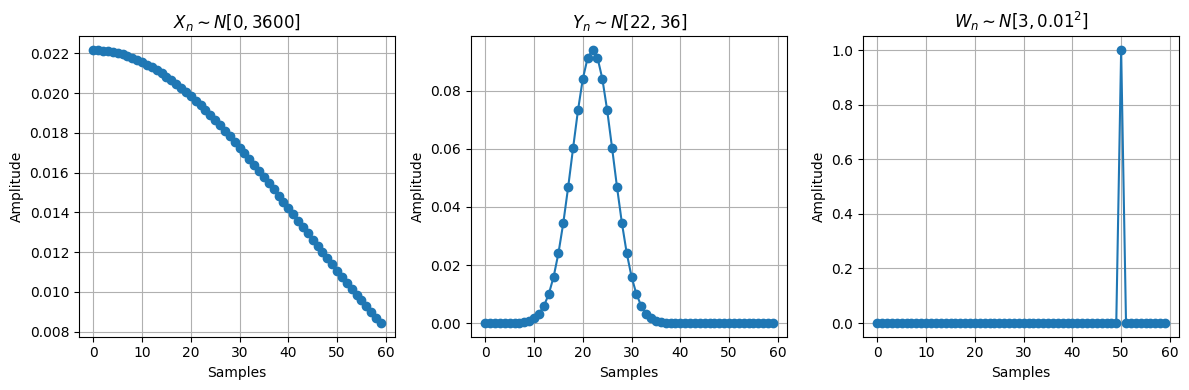

In [6]:
def Gauss(u: float, s: float, N: float) -> np.ndarray:
    n = np.arange(N)  
    gauss_signal = np.exp(-((n - u)**2) / ((s+1e-6)**2) )  #find unnormalized gaussian
    sum_gauss = np.sum(gauss_signal) 
    gauss_signal = gauss_signal/(sum_gauss+1e-6) # normalizing 
    return gauss_signal

canonized_normal_dist = Gauss(0,60,60)
mean_shifted_high_variance = Gauss(22,6,60)
delta= Gauss(50,0.01,60)



plot_three_side_by_side(np.arange(60),canonized_normal_dist,np.arange(60),mean_shifted_high_variance,np.arange(60),delta,titles=[r"$X_n \sim N[0,3600]$",r"$Y_n \sim N[22,36]$"
                                                                                               ,r"$W_n \sim N[3,0.01^2]$"])


#### Gauss Explanation
The function essentially samples a normalized CDF at the points $n=0,\dots,N$ , the mean $\mu$ determines where the plot is centered and the standard deviation $\sigma$ determines how spread out the signal is. The sampled points are normalized to $1$.
- In the left plot we can see a gaussian $\sim N[0,60^2]$ so centered at $0$ which is why we see only half the plot, and $\sigma = 60$ so it's spread out over all the samples (whihc means that due to normalization each sample gets a lower value)
- In the middle plot we can see a gaussian $\sim N[22,6^2]$, so the gaussian is centered at the 22nd sample, and is relatively centered with a standard deviation of 6 - so each sample gets a bigger value due to the normalization 
- In the rightmost plot we get a gaussian $\sim N[50,0.01^2]$ - super centered, it approximates a normalized delta function. We'll note that the only point where the gaussian is sampled and has a nonzero value is 50 so it's normalized to 1. (nonzero value in the computer, mathematically the values are super close to zero)

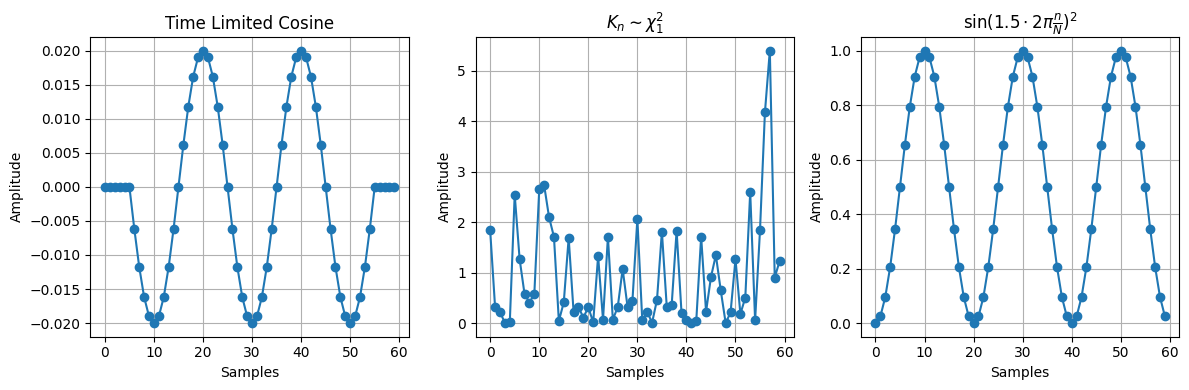

In [7]:
def Prod(u: np.ndarray, v: np.ndarray) -> np.ndarray: 
    result = np.zeros(len(u))
    for i in range(len(u)):
        result[i] = u[i] * v[i]    
    return result

sine_rect = Prod(rect_2,  sine_3)
chi_sq_samples = Prod(canonized_normal_wgn,canonized_normal_wgn)
sine_squared = Prod(Sine(1.5,60,0),Sine(1.5,60,0) )
plot_three_side_by_side(np.arange(60),sine_rect,np.arange(60),chi_sq_samples,np.arange(60),sine_squared,titles=["Time Limited Cosine",r"$K_n \sim \chi^2_1$"
                                                                                               ,r"$\sin(1.5 \cdot 2 \pi \frac{n}{N})^2$"])


### Prod explanation
The product function performs elementwise multiplication of every sample.
- in the leftmost example we can see how multiplication of a cosine with a rect time-limits the cosine, and also changes its amplitude by multiplying it with the square's normalization factor
- in the center example we're generating $\chi^2_1$ samples by multiplying a canonized normal random variable's sample vector by itself
- in the rightmost example we're multiplying a sine signal by itself, creating a signal that is always positive. 


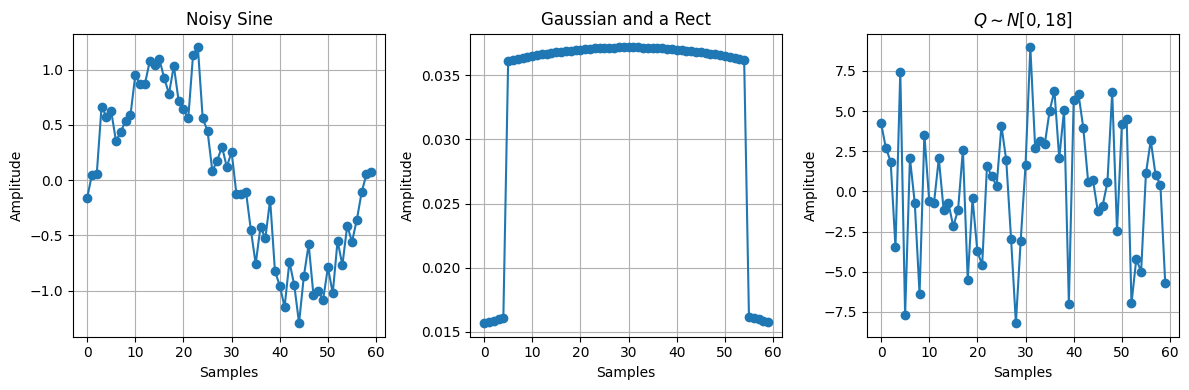

In [8]:
def Add(u: np.ndarray, v: np.ndarray) -> np.ndarray: 
    #add elementwise 
    """alternative approach
+    result = np.zeros(len(u))
    for i in range(len(u)):
        result[i] = u[i] + v[i]    
    return result
    """
    return np.add(u,v)

noisy_sine = Add(Sine(1,60,0), WGN(60,0,0.2))
rect_sine_add = Add(Gauss(30,100,60), rect_2)
normal_samples_add = Add(WGN(60,1,3),WGN(60,-1,3))
plot_three_side_by_side(np.arange(60),noisy_sine,np.arange(60),rect_sine_add,np.arange(60),normal_samples_add,titles=["Noisy Sine","Gaussian and a Rect"
                                                                                               ,r"$Q \sim N[0,18]$"])


### Add Explanation
Add performs elementwise addition of each sample. 
- in the leftmost sample, we use Add to model additive gaussian noise over a sine function.
- in the middle sample we can see how adding a rect to a gaussian CDF raises the rect. it looks neat, not much to it.
- in the last sample we can be evidenced that adding two i.i.d gaussians and sampling them yields a gaussian with a mean that is the sum of the means and an STD that is the sum of the stds - a gaussian at -1 and a gaussian at 1 yield samples that are roughly centered at 0.

In [ ]:

def Scalar(a :float, x: np.ndarray) -> np.ndarray:
    #returns signal multiplied by scalar
    return a * x 

sine_double_scaled = Scalar(2,Sine(1,60,0))
rect_triple_scaled = Scalar(3,Rect(5,55,N=60))
delta_half_scaled =  Scalar(0.5,delta)

plot_three_side_by_side(np.arange(60),sine_double_scaled,np.arange(60),rect_triple_scaled,np.arange(60),delta_half_scaled,titles=["Doubled Sine","Tripled Rect"
                                                                                               ,"Half Delta"])

NameError: name 'np' is not defined

### Scalar Explanation
Scalar performs multiplication of each sample by desired factor. 
- in the leftmost sample, we multiply a simple sine wave by 2.
- in the middle sample, we multiply a rect wave by 3.
- in the last sample, we multiply delta by half.

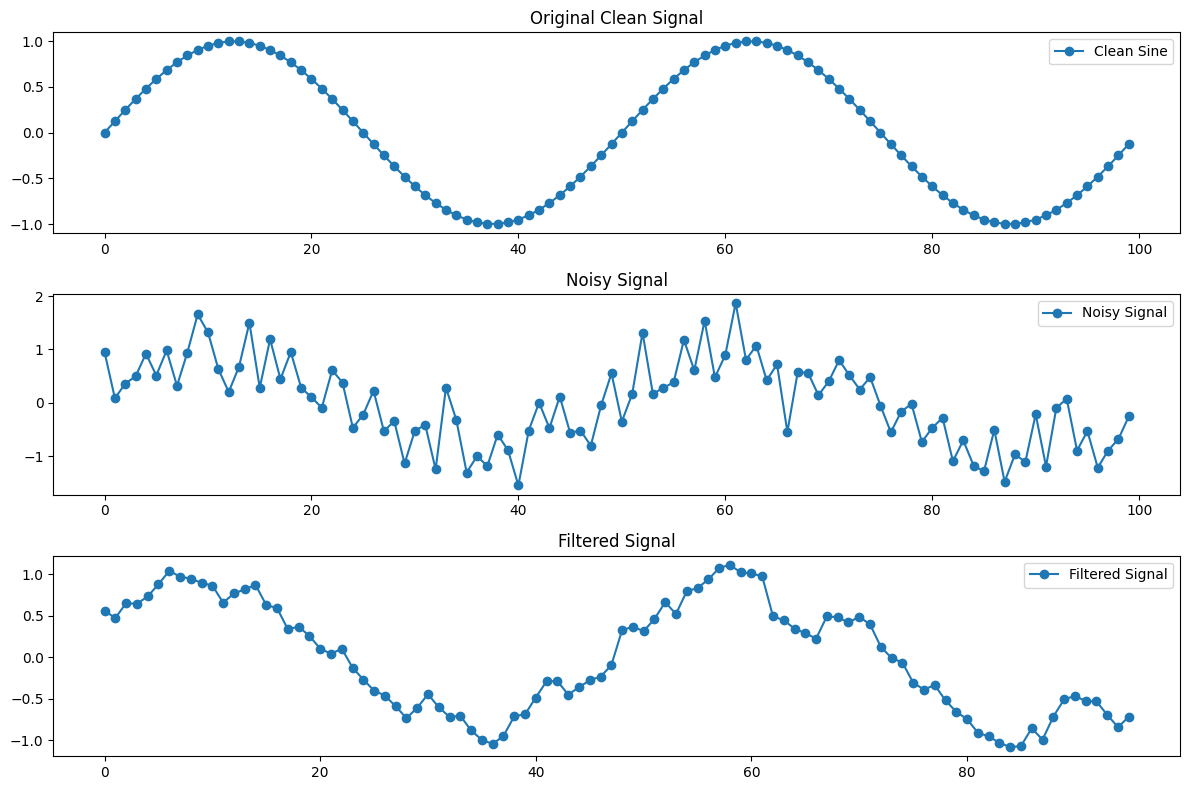

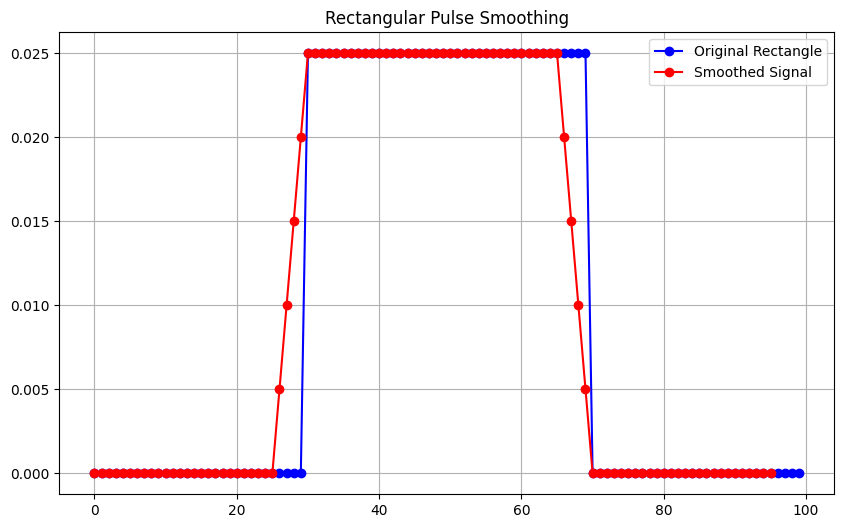

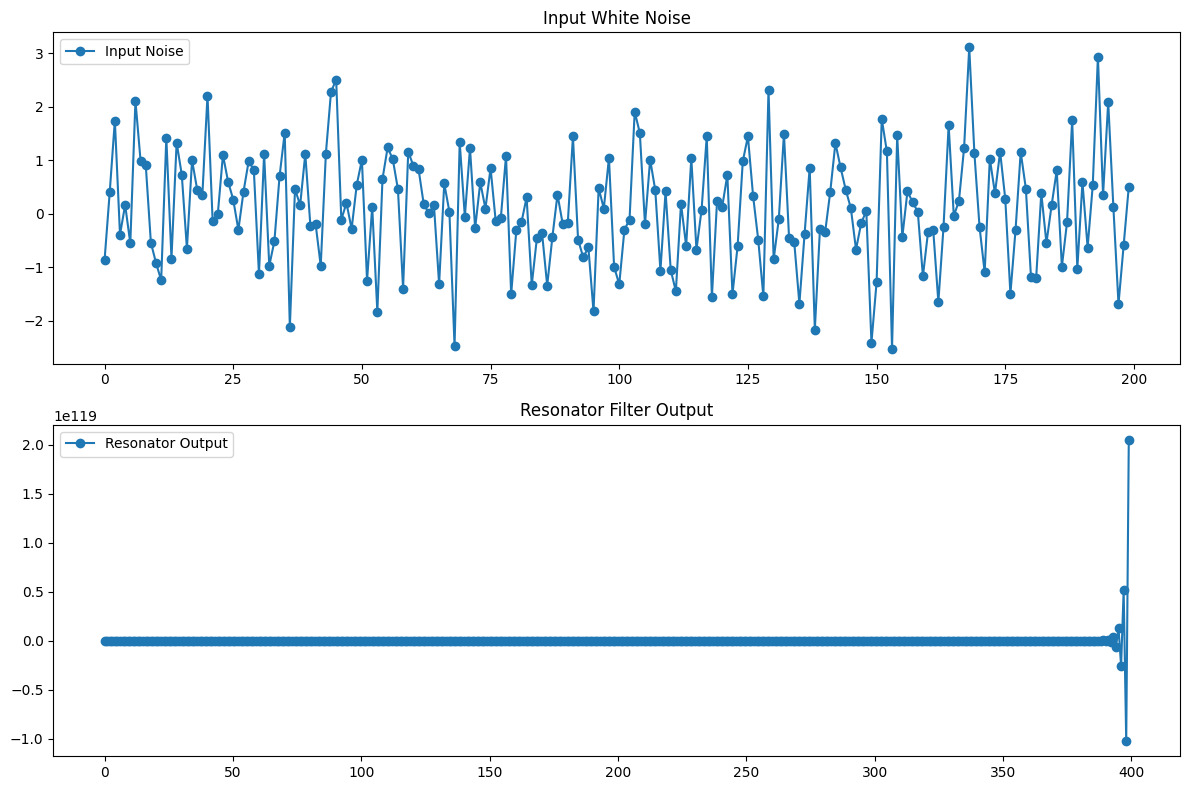

In [10]:
def Filter(an: np.ndarray, bn: np.ndarray, x: np.ndarray) -> np.ndarray:
    """
    Implements a digital filter
    an: AR(Auto-Regressive) coefficients
    bn: MA (Moving Average) coefficients
    x: input signal
    """
    #FIR case
    if len(an) == 1:
        return np.convolve(x, bn/an[0],mode='valid')
    #IIR case
    else:
        N = len(x)
        M = len(bn)
        L = len(an)
        y = np.zeros(2*N)
        u = np.zeros(2*N)
        x_extended = np.append(x,np.zeros(N))
        #u[0] = x[0]
        for n in range(2*N):
            for i in range(min(n,L)):
                u[n] += - an[i]*u[n-i-1]
            u[n] += x_extended[n]
            for k in range(min(n+1,M)):
                y[n] += bn[k]*u[n-k]
        return y

def example1_noisy_sine():
    N = 100
    # Create noisy sine wave
    clean_sine = Sine(f=2, N=N, ph=0)  # 2 cycles over N points
    noise = WGN(N=N, u=0, s=0.5)  # Add significant noise
    noisy_signal = clean_sine + noise
    
    # Design a simple moving average filter to remove noise
    filter_len = 5
    bn = np.ones(filter_len) / filter_len  # Moving average coefficients
    an = np.array([1.0])  # No feedback (FIR filter)
    
    # Apply filter
    filtered_signal = Filter(an, bn, noisy_signal)
    
    # Plot results
    plt.figure(figsize=(12, 8))
    plt.subplot(311)
    plt.plot(clean_sine, label='Clean Sine',marker='o')
    plt.legend()
    plt.title('Original Clean Signal')
    plt.subplot(312)
    plt.plot(noisy_signal, label='Noisy Signal',marker='o')
    plt.legend()
    plt.title('Noisy Signal')
    plt.subplot(313)
    plt.plot(filtered_signal, label='Filtered Signal',marker='o')
    plt.legend()
    plt.title('Filtered Signal')
    plt.tight_layout()
    plt.show()
def example2_smooth_rect():
    N = 100
    # Create rectangular pulse
    rect_signal = Rect(a=30, b=70, N=N)
    
    # Design a smoothing filter
    bn = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # 5-point moving average
    an = np.array([1.0])  # FIR filter
    
    # Apply filter
    smoothed_signal = Filter(an, bn, rect_signal)
    
    plt.figure(figsize=(10, 6))
    plt.plot(rect_signal, 'b-', label='Original Rectangle',marker='o')
    plt.plot(smoothed_signal, 'r-', label='Smoothed Signal',marker='o')
    plt.title('Rectangular Pulse Smoothing')
    plt.legend()
    plt.grid(True)
    plt.show()
def example3_resonator():
    N = 200
    # Create white noise
    noise = WGN(N=N, u=0, s=1.0)
    
    # Design resonator IIR filter
    w0 = 0.2 * np.pi  # Resonant frequency
    r = 0.95          # Pole radius (controls bandwidth)
    
    # IIR coefficients for resonator
    an = np.array([1, -2*r*np.cos(w0), r**2])  # AR coefficients
    bn = np.array([1.0])                        # MA coefficients
    
    # Apply filter
    resonated_signal = Filter(an, bn, noise)
    
    plt.figure(figsize=(12, 8))
    plt.subplot(211)
    plt.plot(noise, label='Input Noise',marker='o')
    plt.title('Input White Noise')
    plt.legend()
    plt.subplot(212)
    plt.plot(resonated_signal, label='Resonator Output',marker='o')
    plt.title('Resonator Filter Output')
    plt.legend()
    plt.tight_layout()
    plt.show()

example1_noisy_sine()
example2_smooth_rect()
example3_resonator()

### Filter explaination
This function moves a seleced signal through an FIR/IIR filter based on given an,bn coefficients $$y[n]=x\circledast f,f=\frac{\sum^mb_n[i]}{\sum^pa_n[i]}$$
Each example demonstrates different aspects:
- First example shows noise reduction using a simple moving average filter
- Second example shows edge smoothing of a rectangular pulse, using the same averaging filter
- Third example shows how a resonator filter can extract the presence of a specific frequency from noise

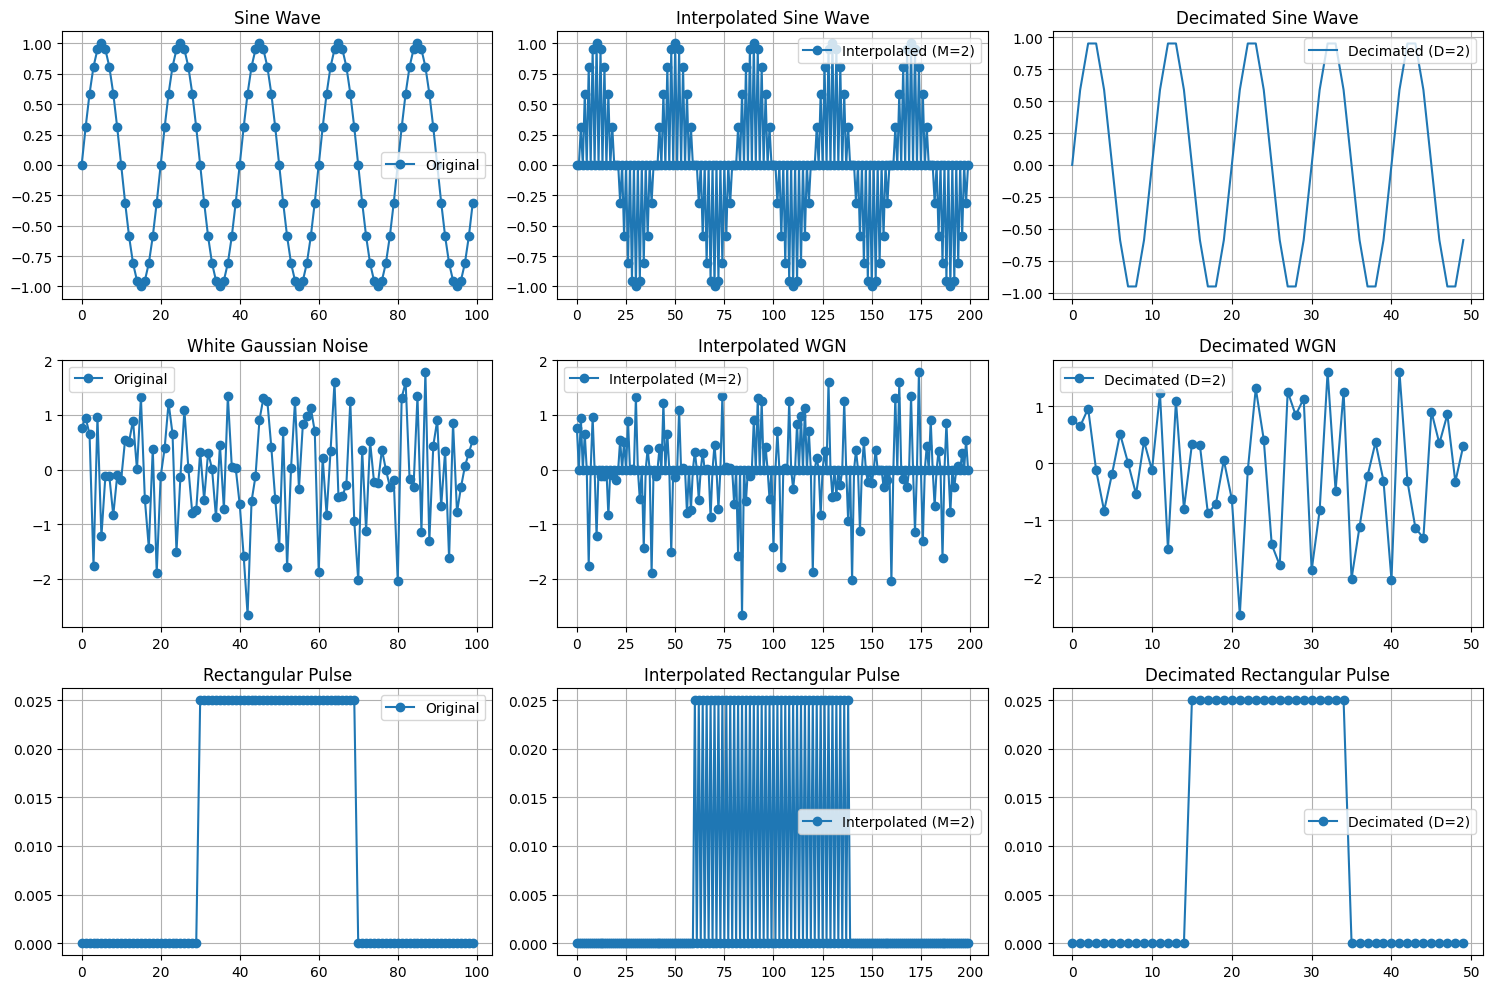

In [11]:


def Interpolate(M: int, x: np.ndarray) -> np.ndarray:
    """
    Performs interpolation by factor M
    First inserts M-1 zeros between samples, then applies a lowpass filter
    """
    # Step 1: Insert M-1 zeros between samples
    y = np.zeros(len(x) * M)
    y[::M] = x

    # # Step 2: Create a lowpass filter using a windowed sinc
    # filter_len = 4 * M + 1  # Length of the filter
    # h = np.sinc(np.linspace(-2, 2, filter_len))  # Sinc with range [-2, 2]
    # h *= np.hamming(filter_len)  # Apply Hamming window
    # h /= np.sum(h)  # Normalize filter to preserve amplitude

    # # Step 3: Apply the filter
    # y_filtered = np.convolve(y, h, mode='same')

    return y


def Decimate(D: int, x: np.ndarray) -> np.ndarray:
    return x[::D]   

# Example 1: Sine Wave
N = 100  # Number of samples
f = 5    # Frequency in cycles per sample
ph = 0   # Phase offset
sine_signal = Sine(f, N, ph)
sine_interpolated = Interpolate(2, sine_signal)
sine_decimated = Decimate(2, sine_signal)

# Example 2: White Gaussian Noise
wgn_signal = WGN(N, 0, 1)
wgn_interpolated = Interpolate(2, wgn_signal)
wgn_decimated = Decimate(2, wgn_signal)

# Example 3: Rectangular Pulse
rect_signal = Rect(30, 70, N)
rect_interpolated = Interpolate(2, rect_signal)
rect_decimated = Decimate(2, rect_signal)

# Plotting the results
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Plot sine wave
axs[0, 0].plot(sine_signal, label='Original',marker='o')
axs[0, 0].set_title('Sine Wave')
axs[0, 1].plot(sine_interpolated, label='Interpolated (M=2)',marker='o')
axs[0, 1].set_title('Interpolated Sine Wave')
axs[0, 2].plot(sine_decimated, label='Decimated (D=2)')
axs[0, 2].set_title('Decimated Sine Wave')

# Plot WGN
axs[1, 0].plot(wgn_signal, label='Original',marker='o')
axs[1, 0].set_title('White Gaussian Noise')
axs[1, 1].plot(wgn_interpolated, label='Interpolated (M=2)',marker='o')
axs[1, 1].set_title('Interpolated WGN')
axs[1, 2].plot(wgn_decimated, label='Decimated (D=2)',marker='o')
axs[1, 2].set_title('Decimated WGN')

# Plot rectangular pulse
axs[2, 0].plot(rect_signal, label='Original',marker='o')
axs[2, 0].set_title('Rectangular Pulse')
axs[2, 1].plot(rect_interpolated, label='Interpolated (M=2)',marker='o')
axs[2, 1].set_title('Interpolated Rectangular Pulse')
axs[2, 2].plot(rect_decimated, label='Decimated (D=2)',marker='o')
axs[2, 2].set_title('Decimated Rectangular Pulse')

# Adjust layout and show plots
for ax in axs.flat:
    ax.legend()
    ax.grid()
plt.tight_layout()
plt.show()


### Interpolate Explanation

Upsamples a signal by a factor \( M \) (inserts \( M-1 \) zeros between samples) and applies a sinc-based low-pass filter to smooth the result by removing high-frequency artifacts introduced by the zero-padding.

### Decimate Explanation

Downsamples a signal by a factor \( D \) (reduces the sampling rate).

### Examples:

#### Sine Wave Example:
- **Original Signal**: A smooth periodic waveform with a frequency of 5 cycles over 100 samples. It’s a fundamental example of a continuous signal often used in signal processing.
- **Interpolated Signal**: The sine wave is stretched by a factor of 2, with additional points interpolated to maintain smoothness. The interpolation enhances resolution, giving a more detailed view of the waveform.
- **Decimated Signal**: The sine wave is reduced to half its original length by keeping every second sample. This reduces the resolution and frequency range, resulting in aliasing if the original frequency exceeds the Nyquist limit.

#### White Gaussian Noise (WGN) Example:
- **Original Signal**: A random signal where values follow a Gaussian distribution. This type of signal is common in modeling noise in communication systems.
- **Interpolated Signal**: The noise signal is upsampled by a factor of 2, with zeros inserted, and the filter smooths the randomness to avoid abrupt transitions.
- **Decimated Signal**: The noise signal is downsampled by keeping every second sample. This results in fewer samples and a reduction in frequency resolution while maintaining the randomness.

#### Rectangular Pulse Example:
- **Original Signal**: A rectangular pulse that starts at sample 30 and ends at sample 70 (40 samples wide). The pulse is normalized so its integral is 1, a common property in signal processing.
- **Interpolated Signal**: The rectangular pulse is stretched by a factor of 2. The interpolation smooths the edges of the pulse due to the low-pass filter, creating a rounded transition instead of sharp changes. 
- **Decimated Signal**: The pulse is reduced to half its original length, effectively reducing its resolution. Sharp transitions are preserved but appear less defined due to the lower sampling rate.


***
## Part 2

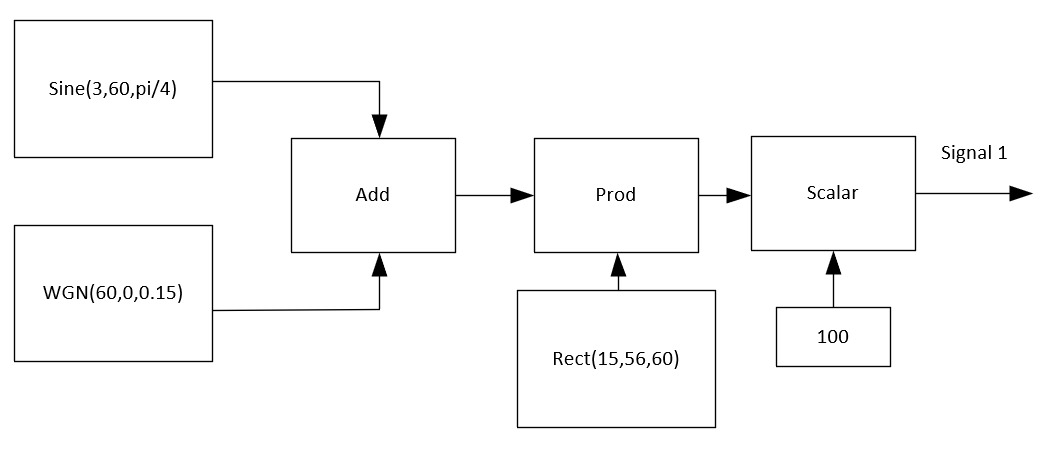

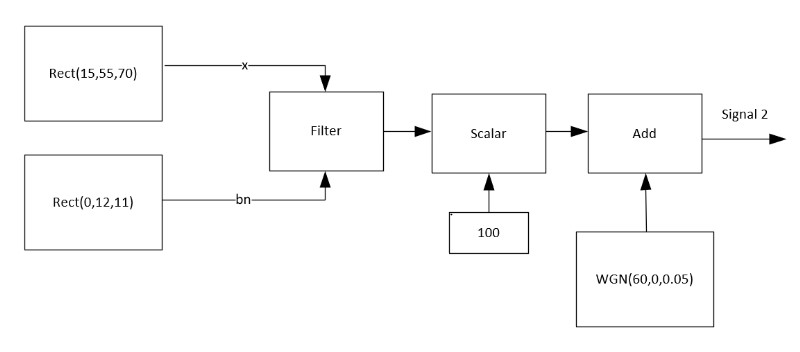

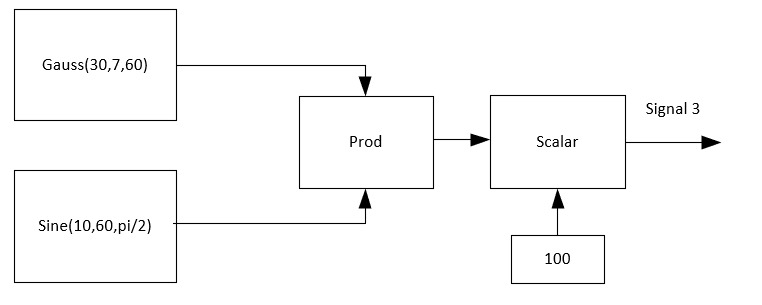

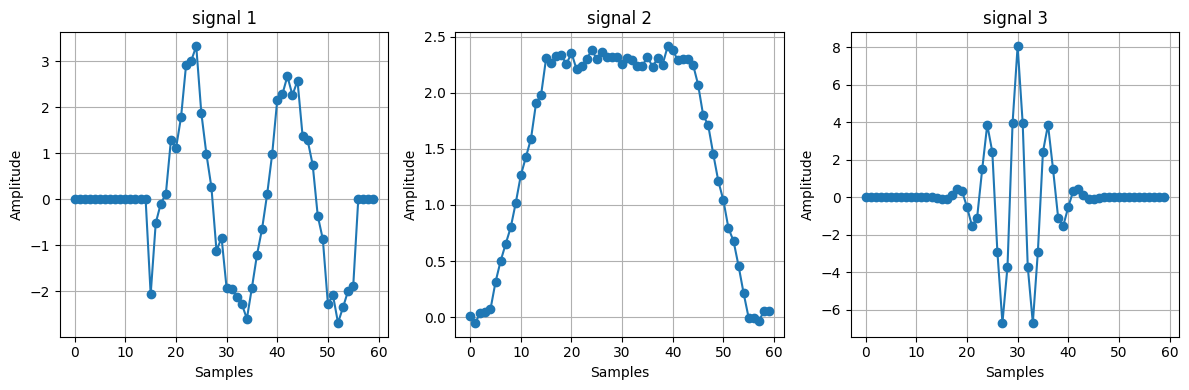

In [12]:
signal_1 = Scalar(Prod(Add(Sine(3,60,np.pi/4),WGN(60,0,0.15)),Rect(15,56,60)),100)
signal_2 =Add(Scalar(Filter([1],Rect(15,55,70),Rect(0,12,11)),100),WGN(60,0,0.05))
signal_3 = Scalar(Prod(Gauss(30,7,60),Sine(10,60,np.pi/2)),100)
plot_three_side_by_side(np.arange(60),signal_1,np.arange(60),signal_2,np.arange(60),signal_3,titles=["signal 1","signal 2", "signal 3"])



### Expectation Estimation 
for estimating the expectation we'll use the empirical mean as our estimator: 
$$\hat{\mu} = \bar{X} = \frac{1}{N}\sum_{i=1}^N X_i = X_t \circledast \text{Rect}[0,N+1,N]$$ 
We'll note that since the convolution is valid, convolving any signal with a normalized rectangle of length $N$ in a valid convolution is equivalent to summing and normalizing all of the samples, creating an empirical mean

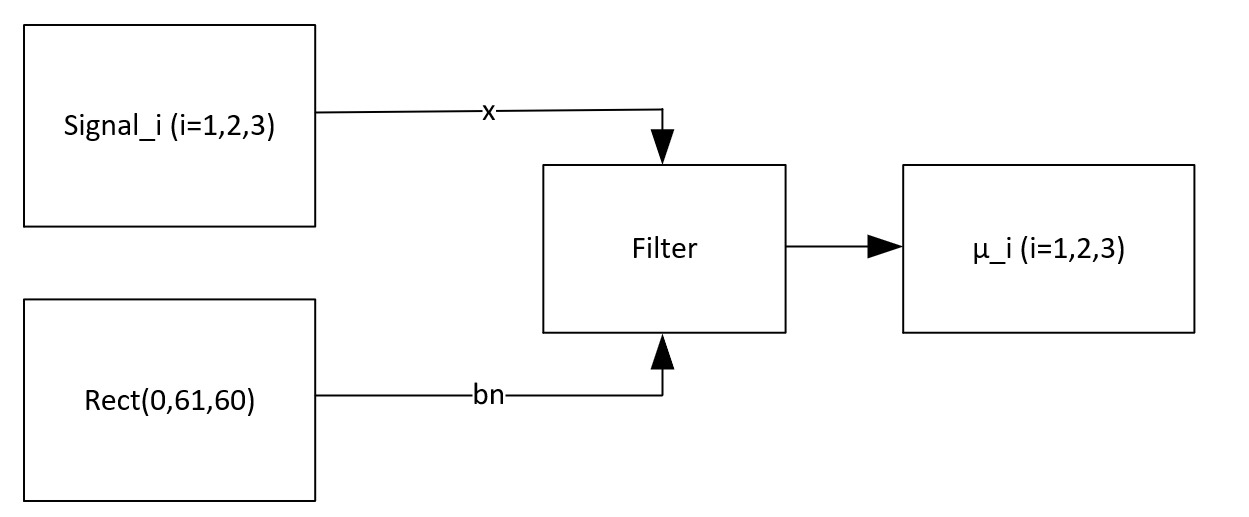

In [13]:
s1_estimated_mean = Filter([1],Rect(0,61,60),signal_1)
s2_estimated_mean = Filter([1],Rect(0,61,60),signal_2)
s3_estimated_mean = Filter([1],Rect(0,61,60),signal_3)
print(f"{s1_estimated_mean=}")
print(f"{s2_estimated_mean=}")
print(f"{s3_estimated_mean=}")

s1_estimated_mean=array([-0.01330545])
s2_estimated_mean=array([1.50963843])
s3_estimated_mean=array([2.4000746e-06])


### Variance Estimation 
for estimating the variance we'll use the Bessel corrected variance as our estimator: 
$$\hat{\sigma^2} = \frac{1}{N-1} \sum_{i=1}^N (X_i-\bar{X})^2$$   
We'll note that since the convolution is valid, convolving any signal with a normalized rectangle of length $N$ in a valid convolution is equivalent to summing and normalizing all of the samples, creating an empirical mean

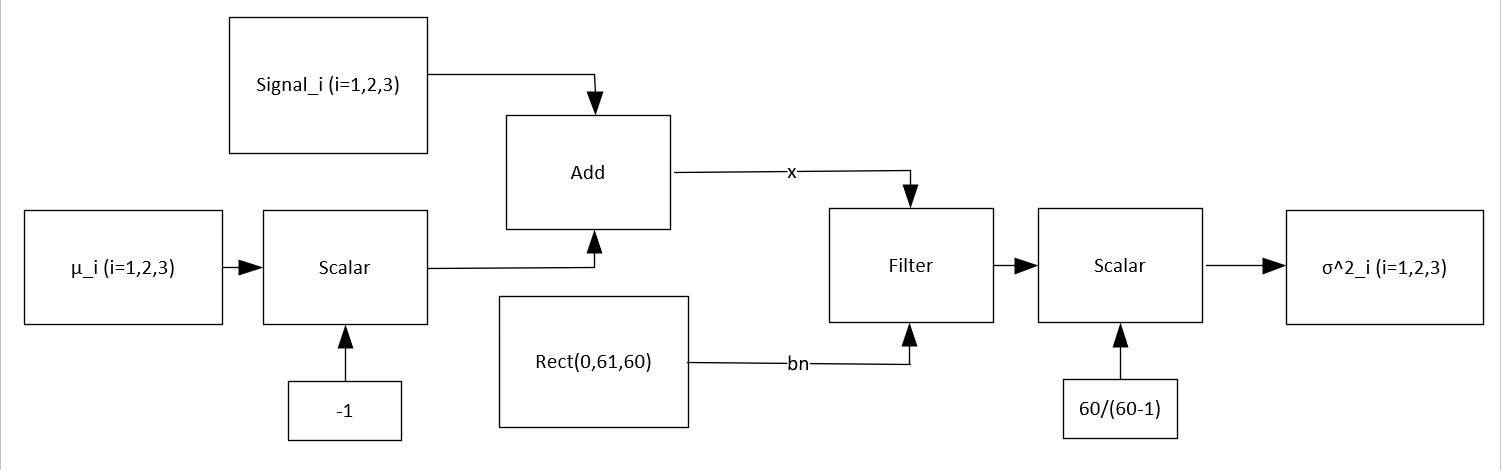

In [14]:
signal_1_centered = Add(signal_1 ,Scalar(s1_estimated_mean,-1))
var_1_estimated = Scalar(Filter([1],Rect(0,61,60),Prod(signal_1_centered,signal_1_centered)),60/(60-1))
signal_2_centered = Add(signal_2 ,Scalar(s2_estimated_mean,-1))
var_2_estimated = Scalar(Filter([1],Rect(0,61,60),Prod(signal_2_centered,signal_2_centered)),60/(60-1))
signal_3_centered = Add(signal_3 ,Scalar(s3_estimated_mean,-1))
var_3_estimated = Scalar(Filter([1],Rect(0,61,60),Prod(signal_3_centered,signal_3_centered)),60/(60-1))

print(f"{var_1_estimated=}")
print(f"{var_2_estimated=}")
print(f"{var_3_estimated=}")


var_1_estimated=array([2.33419751])
var_2_estimated=array([0.83884346])
var_3_estimated=array([4.75063105])


### Example signals - interpolation and decimation:
- We can see how the interpolation places samples inbetween the original ones, while maintaining the overall signal shape except for edge cases where the signal is abruptly zeroed out
- We can see how the decimation takes only a third of the samples, our signal loses detail and definition 

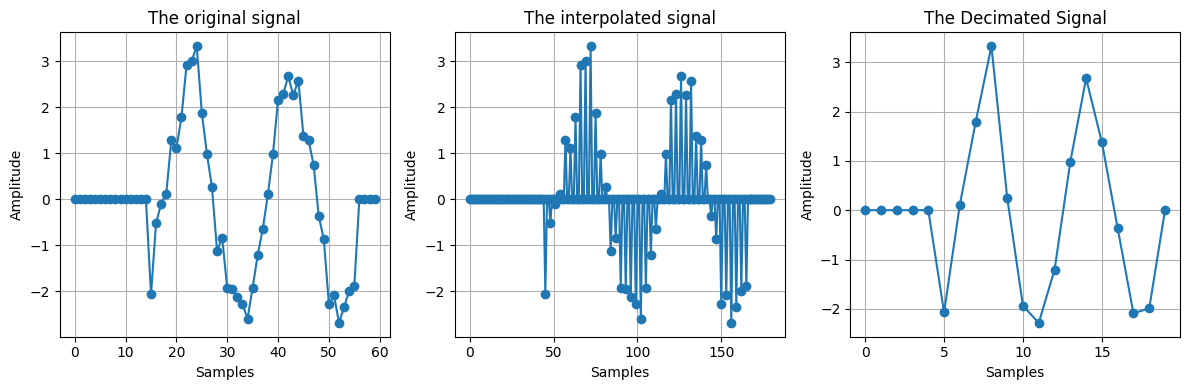

In [15]:
signal_1_interp = Interpolate(M=3,x=signal_1)
signal_1_dec = Decimate(D=3,x=signal_1)
plot_three_side_by_side(np.arange(60), signal_1, np.arange(180),signal_1_interp,np.arange(20),signal_1_dec,titles=["The original signal","The interpolated signal", "The Decimated Signal"])


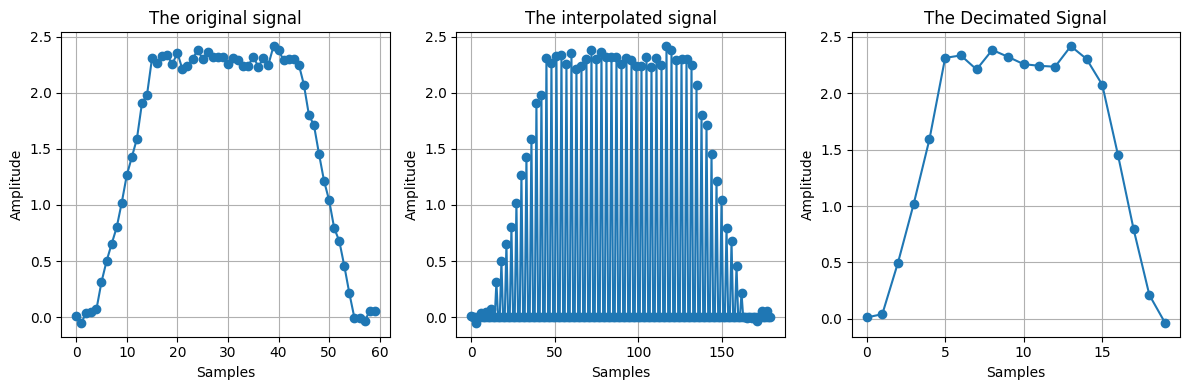

In [16]:
signal_2_interp = Interpolate(M=3,x=signal_2)
signal_2_dec = Decimate(D=3,x=signal_2)
plot_three_side_by_side(np.arange(60), signal_2, np.arange(180),signal_2_interp,np.arange(20),signal_2_dec,titles=["The original signal","The interpolated signal", "The Decimated Signal"])


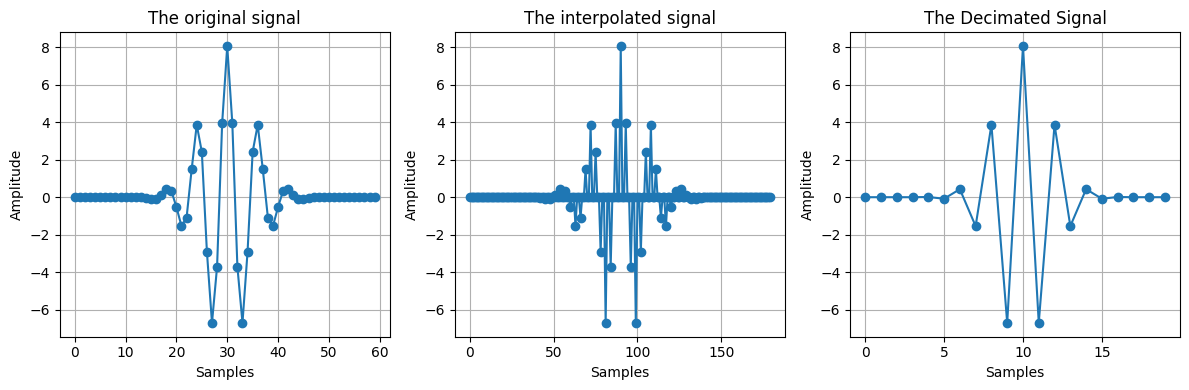

In [18]:
signal_3_interp = Interpolate(M=3,x=signal_3)
signal_3_dec = Decimate(D=3,x=signal_3)
plot_three_side_by_side(np.arange(60), signal_3, np.arange(180),signal_3_interp,np.arange(20),signal_3_dec,titles=["The original signal","The interpolated signal", "The Decimated Signal"])


### interpolation and decimation explanation

as per their definition, decimation removes every sample but the Mth, and interpolation inserts L-1 samples of 0 (which causes the decimated signals to lose detail, and the interpolated signals to look much more jagged due to rapidly switching between zero-samples and the samples of their original size.) 
<br/>
We'll note that chaining together interpolation and decimation effectively changes the sampling frequency by a factor of $\frac{L}{M}$. <br/> If $L$ and $M$ are coprime the order is reversible, for example:




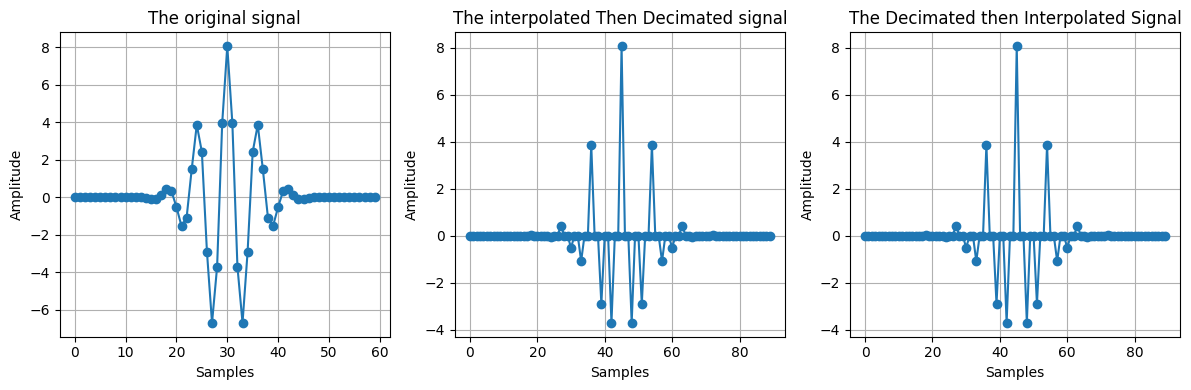

In [23]:
signal_3_interp = Interpolate(M=3,x=signal_3)
signal_3_dec = Decimate(D=2,x=signal_3)
signal_3_interp_dec = Decimate(D=2,x=signal_3_interp)
signal_3_dec_interp = Interpolate(M=3,x=signal_3_dec)
plot_three_side_by_side(np.arange(60), signal_3, np.arange(90),signal_3_interp_dec,np.arange(90),signal_3_dec_interp,
                        titles=["The original signal","The interpolated Then Decimated signal", "The Decimated then Interpolated Signal"])

The reason for reversibility is that after interpolation, the nonzero samples in the interpolated signal occur at indices $kL$, where $k$ is an integer. During decimation, the retained samples occur at indices $mM$ where $m$ is an integer.  

Since $L$ and $M$ are coprime, the equation $kL = mM$ has integer solutions only when both $k$ and $m$ correspond to the original sample indices. This ensures that the original sample points are preserved, and no information is lost regardless of the order of operations.

however, when the indices are not co-prime, we get collisions, and skipped indices, and as a result a loss of information and no-reversibiliy


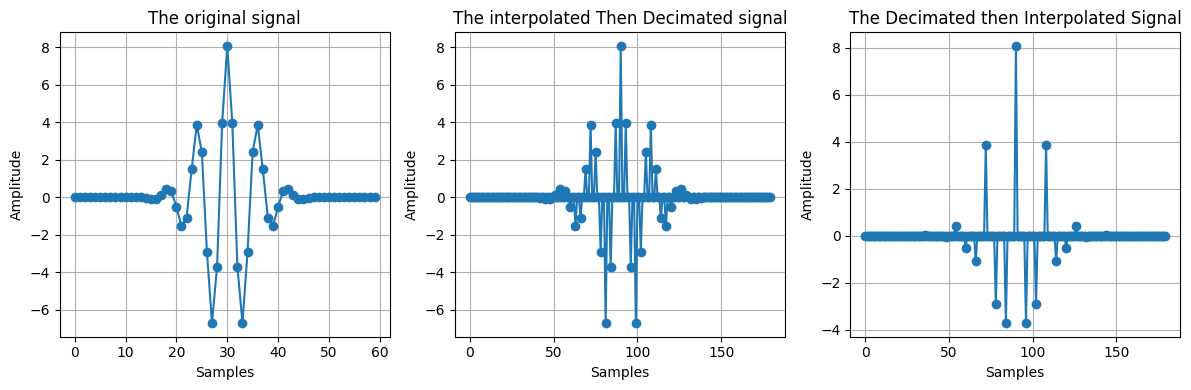

In [24]:
signal_3_interp = Interpolate(M=6,x=signal_3)
signal_3_dec = Decimate(D=2,x=signal_3)
signal_3_interp_dec = Decimate(D=2,x=signal_3_interp)
signal_3_dec_interp = Interpolate(M=6,x=signal_3_dec)
plot_three_side_by_side(np.arange(60), signal_3, np.arange(180),signal_3_interp_dec,np.arange(180),signal_3_dec_interp,
                        titles=["The original signal","The interpolated Then Decimated signal", "The Decimated then Interpolated Signal"])